In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import itertools
sns.set_style("whitegrid")
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [13]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
dfc = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


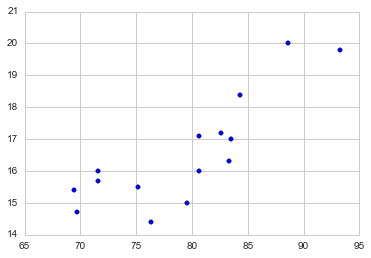

In [14]:
plt.scatter(dfc["Ground Temperature"], dfc["Chirps/Second"])

In [15]:
regres = linear_model.LinearRegression()
reshape_temp = dfc["Ground Temperature"].values.reshape((-1, 1))
regres.fit(reshape_temp, dfc["Chirps/Second"].values)

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
regres2 = linear_model.LinearRegression()
reshape_chir = dfc["Chirps/Second"].values.reshape((-1, 1))
regres2.fit(reshape_chir, dfc["Ground Temperature"].values)

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("y = {}x + {}".format(regres.coef_[0], regres.intercept_))

y = 0.20299973140771355x + 0.4593146452359598


In [18]:
def plot_regression_c(fn):
    plt.scatter(dfc["Ground Temperature"], dfc["Chirps/Second"])
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    plt.ylim(ymax=21, ymin=13)
    plt.plot(xs, [fn(x) for x in xs])

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


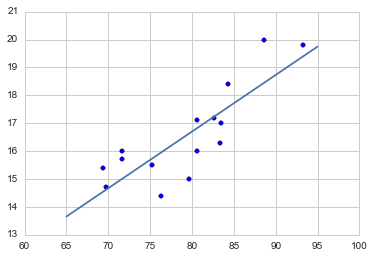

In [19]:
fn = lambda x: regres.predict(x)[0]
plot_regression_c(fn)

In [20]:
print(regres.score(reshape_temp, dfc["Chirps/Second"]))
print(regres.predict([95]))
print(regres2.predict([18]))

0.692294652915
[ 19.74428913]
[ 84.2347963]


From this we can see that the R^2 score is not so good at .69, making us think that this is not a good fit for the data.
At temperatures of 95 degrees we can assume that the crickets will be making 19.7 chirps per second.
If we hear chirps of around 18 chirps per second we can assume that the temperature is approximatly 84 degrees.

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [21]:
dfbb = pd.read_fwf("brain_body.txt")

In [22]:
dfbb.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


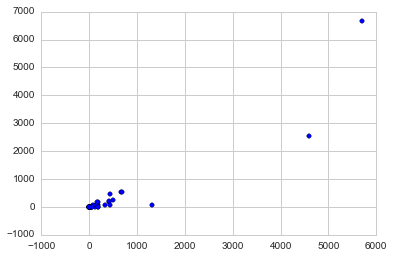

In [23]:
plt.scatter(dfbb['Body'], dfbb['Brain'])

In [24]:
regresbb = linear_model.LinearRegression()
reshape_body = dfbb["Body"].values.reshape((-1, 1))
regresbb.fit(reshape_body, dfbb["Brain"].values)

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(regresbb.score(reshape_body, dfbb["Brain"]))
print(regresbb.predict([95]))

0.872662084304
[ 28.92118461]


In [26]:
def plot_regression_bb(fn):
    plt.scatter(dfbb["Body"], dfbb["Brain"])
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    plt.ylim(ymax=7000, ymin=-1000)
    plt.plot(xs, [fn(x) for x in xs])

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


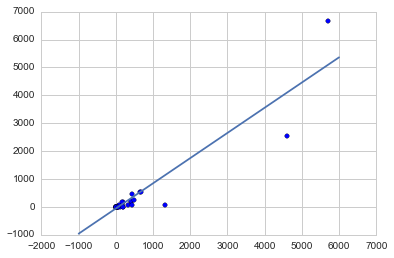

In [27]:
fn = lambda x: regresbb.predict(x)[0]
plot_regression_bb(fn)

In [28]:
print("y = {}x + {}".format(regresbb.coef_[0], regresbb.intercept_))
print(regresbb.score(reshape_body, dfbb["Brain"]))

y = 0.9029129477287058x + -56.8555454285964
0.872662084304


The R^2 score from this test is rather good at .87. Most of the data is close to the line with a few lying rather far out. However it is consistent with brain weight being dependent on body weight.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [29]:
dfs = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [30]:
dfs.mean()

Sex           0.269231
Rank          2.038462
Year          7.480769
Degree        0.653846
YSdeg        16.115385
Salary    23797.653846
dtype: float64

In [31]:
dfs.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [32]:
input_data = dfs[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
salary = dfs["Salary"]

In [33]:
regress = linear_model.LinearRegression()
fit = regress.fit(input_data, salary)
print(regress.score(input_data, salary))
print(regress.coef_)
print(regress.intercept_)

0.854718067441
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]
11410.1465473


In [34]:
dependent_vars = list(dfs.columns)
dependent_vars.remove("Salary")
combos = list(itertools.combinations(dependent_vars, 2))

In [35]:
choices = []

def regression_for(combos):
    combo = list(combos)
    df = dfs.loc[:, combo + ['Salary']]
    df.dropna(inplace = True)
    input_data = df[combo]
    salary = dfs['Salary']
    regres = linear_model.LinearRegression()
    regres.fit(input_data, salary)
    return regres, regres.score(input_data, salary)

for combo in combos:
    rgr, score = regression_for(combo)
    choices.append((combo, score))

best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Rank', 'Year'), 0.84364809332645985)
[ 4731.2563918   376.4992803] 11336.6654314


The best combination of columns in the dataframe for an R^2 score is that of Rank and Year. This making a good amount of sense seeing as how closly your position and time spent on the job is usually linked.

In [44]:
for i in range(0, 2):
    print("Sex: {}".format(i), regress.predict([i, 2.038462, 7.480769, 1, 16.115385 ]))

Sex: 0 [ 23002.37379928]
Sex: 1 [ 24244.16629888]


In [43]:
sex_salary = dfs[["Sex", "Salary"]]

In [48]:
regresss = linear_model.LinearRegression()
reshape_sex = sex_salary["Sex"].values.reshape((-1, 1))
regresss.fit(reshape_sex, sex_salary["Salary"].values)

/Users/MatthewBarnette/iron_yard_hw/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
print(regresss.score(reshape_sex, sex_salary["Salary"]))

0.0638989258329


Here we have some interesting data. Taken on it's own sex doesn't seem to have much of an impact on pay, with an R^2 score of .06. However, when used in conjunction with the other variables in the dataframe, it reveals an aproximate disparity of $1,200. And I would catagorize this as a rather significant amount.